# Get Galaxies From Halos

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
rm  : https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/RedMaPPer_on_Y3A2 <br>
path: /project/projectdirs/des/www/y3_cats/	

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import esutil

## Load

In [13]:
import h5py

#path   = '/data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/'
path   = '/data/des81.b/data/mariaeli/y3_cats/subsampled/'
fname  =     path+'Y3_GOLD_2_2.1_subsampled.h5'
fname_aux  = path+'Y3_GOLD_2_2.1_DNF_subsampled.h5'

master = h5py.File(fname,'r')
aux    = h5py.File(fname_aux,'r')

In [14]:
ls /data/des81.b/data/mariaeli/y3_cats/subsampled

Y3_GOLD_2_2.1_BPZ_subsampled.h5
Y3_GOLD_2_2.1_DNF_subsampled.h5
Y3_GOLD_2_2_1_maps.h5
Y3_GOLD_2_2.1_subsampled.h5
y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.h5
Y3_mastercat_6_15_19_subsampled.h5
y3v02-mcal-003-v1_subsampled.h5


In [15]:
ls /global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/v1.9.8/sampleselection/Y3a/mastercat/

ls: cannot access /global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/v1.9.8/sampleselection/Y3a/mastercat/: No such file or directory


In [16]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [17]:
master.visititems(show_h5_dataset)

(u'catalog/gold/a_sed_sfd98_g', <HDF5 dataset "a_sed_sfd98_g": shape (39926304,), type ">f4">)
(u'catalog/gold/a_sed_sfd98_i', <HDF5 dataset "a_sed_sfd98_i": shape (39926304,), type ">f4">)
(u'catalog/gold/a_sed_sfd98_r', <HDF5 dataset "a_sed_sfd98_r": shape (39926304,), type ">f4">)
(u'catalog/gold/a_sed_sfd98_z', <HDF5 dataset "a_sed_sfd98_z": shape (39926304,), type ">f4">)
(u'catalog/gold/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (39926304,), type ">i8">)
(u'catalog/gold/dec', <HDF5 dataset "dec": shape (39926304,), type ">f8">)
(u'catalog/gold/delta_mag_chrom_g', <HDF5 dataset "delta_mag_chrom_g": shape (39926304,), type ">f4">)
(u'catalog/gold/delta_mag_chrom_i', <HDF5 dataset "delta_mag_chrom_i": shape (39926304,), type ">f4">)
(u'catalog/gold/delta_mag_chrom_r', <HDF5 dataset "delta_mag_chrom_r": shape (39926304,), type ">f4">)
(u'catalog/gold/delta_mag_chrom_z', <HDF5 dataset "delta_mag_chrom_z": shape (39926304,), type ">f4">)
(u'catalog/gold/delta_mag_y4_g', <

In [18]:
aux.visititems(show_h5_dataset)

(u'catalog/sheared_1m/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_1m/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_1p/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_1p/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_2m/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_2m/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_2p/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_2p/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), type ">f4">)
(u'catalog/unsheared/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (39926304,), type ">i8">)
(u'catalog/unsheared/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/unsheared/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), t

In [19]:
mag_i      = master['catalog/gold/sof_cm_mag_corrected_i'][:][:]
maglim_idx = np.where((mag_i<=23.)&(mag_i>=0.))
hpx16384   = master['catalog/gold/hpix_16384'][:][maglim_idx]#.astype(np.int64)

cid   = aux['catalog/unsheared/coadd_object_id'][:]
zmean = aux['catalog/unsheared/zmean_sof'][:]

master.close()
aux.close()

In [22]:
mag_i[maglim_idx]

array([21.61505009, 20.68373325, 22.85796721, ..., 21.75018892,
       19.4035524 , 22.85715772])

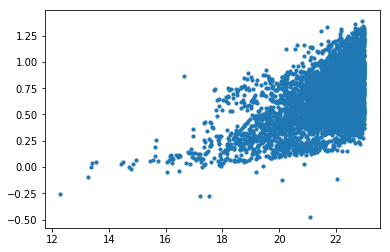

In [24]:
plt.scatter(mag_i[maglim_idx][::4000],zmean[maglim_idx][::4000],s=10)

In [26]:
columns = ['hpix_16384','coadd_object_id','ra','dec','extended_class_mash_sof','flags_gold']
columns+= ['mag_%s'%(ix) for ix in ['g','r','i','z']]
columns+= ['mag_err_%s'%(ix) for ix in ['g','r','i','z']]

In [27]:
columns

['hpix_16384',
 'coadd_object_id',
 'ra',
 'dec',
 'extended_class_mash_sof',
 'flags_gold',
 'mag_g',
 'mag_r',
 'mag_i',
 'mag_z',
 'mag_err_g',
 'mag_err_r',
 'mag_err_i',
 'mag_err_z']

### Loading Data

In [25]:
## Healpix map
Nside    = 8
outdir   = '/global/u2/j/jesteves/codes/buzzardAnalysis/buzzardSelection/notebooks/Heidi'
hpx_file = outdir+'/hpxmap_nside%i_buzzard_y3_v2.0.0.fits'%Nside

In [26]:
hpx_map = Table(getdata(hpx_file))
#tiles   = np.where(hpx_map['hpx_value']>30)[0]
tiles = np.array(hpx_map['hpx_pixel'][(hpx_map['hpx_value']>0)&(hpx_map['hpx_pixel']<=550)&(hpx_map['hpx_pixel']>=500)])

In [27]:
tiles

array([519, 520, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532,
       533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545,
       546, 547, 548, 549, 550])

In [28]:
len(tiles)

31

In [29]:
## get cluster data

file1= '/global/homes/h/haoyiwu/data/buzzard-1.9.8/buzzard-1.9.8_3y3a_run_halos_lambda_chisq.fit'

cat  = Table(getdata(file1))
cat.rename_column('Z','redshift')

In [30]:
ra,dec= cat['RA'], cat['DEC']
zcls  = cat['Z_LAMBDA']

zcut  = (zcls<=0.65)&(zcls>=0.2)

#lmask = cat['LAMBDA_CHISQ']>=20. & zcut
lmask = (cat['LAMBDA_CHISQ']>=5.)&(cat['LAMBDA_CHISQ']<=20.)&zcut

#patch = dec<40.#(dec>-0.5)&(dec<0.5)&(ra<30)
#cut = np.where(lmask&patch)

cut = np.where(lmask)


In [31]:
cat = cat[cut]

In [32]:
# ra_min,ra_max   = 26.,30.
# dec_min,dec_max = -44.5,-43.

# mask = (cat['RA']<ra_max)&(cat['RA']>ra_min)
# mask&= (cat['DEC']<dec_max)&(cat['DEC']>dec_min)

In [33]:
cls_columns = ['HALOID', 'M200', 'R200', 'MEM_MATCH_ID', 'RA', 'DEC', 'redshift', 'Z_COS', 'P_BCG', 'Z_LAMBDA', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_CHISQ_ZORIG',
               'SCALEVAL', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'MASKFRAC', 'GEOMASKFRAC', 'R_LAMBDA', 'R_MASK', 'Z_LAMBDA_E', 'NCROSS', 'Z_LAMBDA_NITER', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 
               'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2','Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'BCG_SPEC_Z', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD']

cat = cat[cls_columns]

In [34]:
print(len(cat))

251417


### Healpix Matching

In [35]:
import sys
# sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/buzzardSelection/scripts/')
sys.path.append('/global/u2/j/jesteves/codes/buzzardAnalysis/buzzardSelection/scripts/')
from helper import AngularDistance,get_healpix_list,radec_pix

In [36]:
# ra,dec= cat['RA'], cat['DEC']
# lmask = cat['LAMBDA_CHISQ']>5.
# patch = (dec>-0.5)&(dec<0.5)&(ra<30)

# cut = np.where(lmask&patch)

In [ ]:
rad2deg  = 180/np.pi
rmax     = 8 #Mpc around each cluster

#r200     = cat['R200'][:]*0.7 ## Mpc
DA       = np.ones_like(np.array(cat['redshift']))
# DA[cut]  = AngularDistance(np.array(cat['redshift'][cut]))
DA  = AngularDistance(np.array(cat['redshift']))

## compute the radii max
cat['rmax']  = 60*(float(rmax)/DA)*rad2deg ## arcmin

In [ ]:
ra,dec= cat['RA'], cat['DEC']
cluster_tile = radec_pix(ra,dec,nside=8)

In [ ]:
_ = plt.hist(cluster_tile,bins=51)

In [ ]:
#plt.hist(cat['redshift'])

In [ ]:
tiles

In [ ]:
np.where(cluster_tile==tiles[0])

### Retrieving Galaxy Catalogs

In [34]:
def save_hdf5_output(gal,cat,outfile):
    df  = gal.to_pandas()
    df.to_hdf(outfile, key='members', mode='w')

    gal = 0

    dfc = cat.to_pandas()
    dfc.to_hdf(outfile, key='cluster', mode='a')

In [35]:
def load_hdf_files(infile,indices,columns,path='catalog/gold/'):
    master = h5py.File(infile,'r')
    gold   = master[path]
    
    mydict = dict().fromkeys(columns)
    
    mydict['id'] = indices
    for col in columns:
        mydict[col] = gold[col][:][indices]
    
    master.close()
    return Table(mydict)

In [36]:
from time import time

In [37]:
# fname  = path+'Buzzard_v1.9.8_Y3a_bpz.h5'
# indexes= h5py.File(fname)
# bpz    = indexes['catalog/bpz']

# #b_cid  = bpz['coadd_object_id'][:][maglim_idx]
# z      = bpz['z'][:][maglim_idx]
# zmean  = bpz['zmean_sof'][:][maglim_idx]

# indexes.close()

In [38]:
indexes= h5py.File(fname_aux,'r')
dnf    = indexes['catalog/dnf/unsheared']

d_cid  = dnf['coadd_object_id'][:][maglim_idx]
d_z    = dnf['z'][:][maglim_idx]
d_zmean= dnf['z_mean'][:][maglim_idx]
d_sigma= dnf['z_sigma'][:][maglim_idx]

indexes.close()

In [39]:
## BE CAREFULL! The cells below take about an hour to run

In [46]:
outdir = '/global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/'
outfile_base = outdir+'buzzard_y3_v2.0.0_redmapper_heidi_lgt5_lw20_copper_hpx8_{}.hdf'

In [ ]:
fname  = path+'Buzzard_v1.9.8_Y3a_gold.h5'

t0 = time()

time_evolution = np.empty((len(tiles)+1,),dtype=np.float64)
time_evolution[0] = t0

for i, tile in enumerate(tiles):
    print('start tile: %i'%(tile))
    outfile = outfile_base.format(tile)
    w       = np.where(cluster_tile==tile)[0]

    if (len(w)>1) & (not os.path.isfile(outfile)):
        circles= get_healpix_list(cat[w],nside=16384)
        match  = esutil.numpy_util.match(circles,hpx16384)
        indices= maglim_idx[match[1]]
        print('matching: done')
        data               =  load_hdf_files(fname,indices,columns,path='catalog/gold/')
        #data['z']          = z[match[1]]
        #data['z_mean_bpz'] = zmean[match[1]]
        
        print('loading main data: done')
        data['z']          = d_z[match[1]]
        data['z_mean_dnf'] = d_zmean[match[1]]
        data['z_sigma_dnf']= d_sigma[match[1]]

        data['index']= indices
        data['tile'] = tile

        save_hdf5_output(data,cat[w],outfile)
        data = 0
        print('outfile saved: %s'%(outfile))
    else:
        print('Error: empty tile')
    
    time_evolution[i+1] = time()
    print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
    print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
    print('\n')

start tile: 519
Error: empty tile
partial time: 0.00 min
run time    : 0.00 min


start tile: 520
Error: empty tile
partial time: 0.00 min
run time    : 0.00 min


start tile: 522
matching: done
loading main data: done
outfile saved: /global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt5_lw20_copper_hpx8_522.hdf
partial time: 4.14 min
run time    : 4.14 min


start tile: 523
matching: done
loading main data: done
outfile saved: /global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt5_lw20_copper_hpx8_523.hdf
partial time: 16.51 min
run time    : 20.65 min


start tile: 524


In [ ]:
## In case that the memory crashes, delete the photoz variables (z,zmean,d_zmean,d_sigma) and run the cell below

In [ ]:
# fname     = path+'Buzzard_v1.9.8_Y3a_gold.h5'
# fname_bpz = path+'Buzzard_v1.9.8_Y3a_bpz.h5'
# fname_dnf = fname_aux

# t0 = time()

# time_evolution = np.empty((len(tiles)+1,),dtype=np.float64)
# time_evolution[0] = t0

# for i, tile in enumerate(tiles):
#     print('start tile: %i'%(tile))
    
#     w      = esutil.numpy_util.where1(cluster_tile==tile)
#     circles= get_healpix_list(cat[w],nside=Nside)
    
#     match  = esutil.numpy_util.match(circles,hpx16384)
#     indices= maglim_idx[match[1]]
    
#     data = load_hdf_files(fname,indices,columns,path='catalog/gold/')
#     bpz  = load_hdf_files(fname_bpz,indices,['z','zmean_sof'],path='catalog/bpz/')
#     dnf  = load_hdf_files(fname_aux,indices,['z_mean','z_sigma'],path='catalog/dnf/unsheared')
    
#     data['z']          = bpz['z']
#     data['z_mean_bpz'] = bpz['zmean_sof']

#     data['z_mean_dnf'] = dnf['z_mean']
#     data['z_sigma_dnf']= dnf['z_sigma']
    
#     data['index']= indices
#     data['tile'] = tile
#     time_evolution[i+1] = time()
    
#     outfile = outfile_base.format(tile)
#     save_hdf5_output(data,cat[w],outfile)
#     data = 0
#     print('outfile saved: %s'%(outfile))
    
#     print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
#     print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
#     print('\n')

In [43]:
import pandas as pd

In [44]:
def upload_dataFrame(infile,keys='members'):
    hdf = pd.HDFStore(infile, mode='r')
    df1 = hdf.get(keys)
    hdf.close()
    data = Table.from_pandas(df1)
    return data

In [59]:
hi = 523
outfile = outfile_base.format(hi)

In [60]:
gi = upload_dataFrame(outfile,keys='members')
ra, dec = gi['ra'], gi['dec']

In [61]:
np.count_nonzero(gi['z_mean_dnf']<0)

48

In [62]:
1.*np.count_nonzero(gi['z_mean_dnf'])/len(gi)


0.4745696029308564

In [63]:
w = np.where(cluster_tile==hi)[0]
rac,decc = cat['RA'][w],cat['DEC'][w]

#circles= get_healpix_list(cat[w],nside=16384)
#match  = esutil.numpy_util.match(circles,hpx16384)

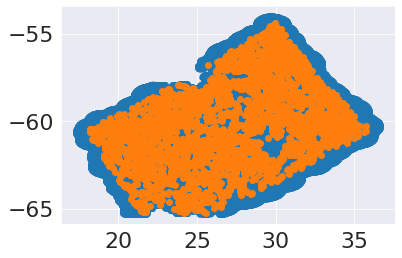

In [64]:
plt.scatter(ra[::10],dec[::10],alpha=0.3)
plt.scatter(rac,decc)

In [65]:
gi

hpix_16384,haloid,coadd_object_id,ra,dec,rhalo,mag_g,mag_r,mag_i,mag_z,mag_err_g,mag_err_r,mag_err_i,mag_err_z,id,z,z_mean_dnf,z_sigma_dnf,index,tile
int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float64,float64,float64,int64,int64
2188105424,6842002,55004483507,26.644524,-65.307175,14.228594,25.764538,24.670198,23.70907,23.057034,1.2157977,0.39976475,0.26391461,0.27698076,406553171,0.0,0.0,0.0,406553171,523
2188105425,10088009,55006603960,26.65209,-65.303734,1.1247274,23.018944,22.64656,22.30846,22.244902,0.11992175,0.07998004,0.09179322,0.15108886,406553178,0.17872399662615318,0.15630195886785303,0.3684975936665678,406553178,523
2188105426,22887049,55011224550,26.64026,-65.30607,3.6125004,26.232098,24.253967,23.177814,22.659039,1.9261155,0.28766987,0.17079347,0.19420825,406553180,0.0,0.0,0.0,406553180,523
2188105427,10484703,55000058650,26.650574,-65.30178,4.648197,22.357143,21.42031,21.340902,20.981531,0.07995001,0.035281047,0.050583087,0.06353945,406553184,0.31590850888861294,0.3841885219833922,0.03405260362276044,406553184,523
2188105427,22887049,55011022838,26.652613,-65.3006,3.6044576,24.117243,22.790611,21.90962,21.609365,0.28985152,0.090362266,0.06911121,0.09453286,406553186,0.5974344370413747,0.6540654568812188,0.193408302762124,406553186,523
2188105427,22887049,55011046783,26.65009,-65.30009,3.6761146,23.715147,22.853493,22.064396,21.88017,0.19957934,0.09281834,0.075448416,0.114471436,406553187,0.5973027784318978,0.7476444452526819,0.3025285522608968,406553187,523
2188105428,22805585,55009953030,26.660395,-65.30136,5.313474,24.346054,22.321669,21.77955,21.356615,0.3643616,0.06254824,0.06419452,0.07937848,406553192,0.482629243568895,0.4547992734948521,0.12566779715202953,406553192,523
2188105429,23973757,55015563545,26.665836,-65.30059,5.242022,24.829851,24.383337,23.812756,23.075056,0.5328818,0.3166086,0.30580658,0.28764504,406553194,0.0,0.0,0.0,406553194,523
2188105429,6781484,55002436624,26.667051,-65.29829,12.2043495,25.420479,24.437332,23.731596,23.745565,0.9095256,0.32559866,0.27300096,0.51701945,406553195,0.0,0.0,0.0,406553195,523


In [ ]:
import healpy as hp
def hpix2ang(pix,nside=1024):
    lon,lat = hp.pix2ang(nside,pix,nest=True)
    dec,ra=(90-(lon)*(180/np.pi)),(lat*(180/np.pi))
    return ra,dec

In [ ]:
ra, dec = hpix2ang(circles,nside=16384)
gra,gdec = hpix2ang(myidx,nside=16384)

In [ ]:
plt.scatter(ra[::10],dec[::10])
plt.scatter(gra[::1000],gdec[::1000])

In [ ]:
data =  load_hdf_files(fname,maglim_idx[match[1]],columns,path='catalog/gold/')

In [ ]:
plt.plot(match[1],data['id'])

In [ ]:
plt.plot(data['hpix_16384'],hpx16384[match[1]])

In [ ]:
maglim_idx[match[1]]

In [ ]:
master  = h5py.File(fname,'r')
indexes= h5py.File(fname_aux,'r')

#select  = indexes['index/gold/select'][:]
# myidx   = master['catalog/gold/hpix_16384'][:][maglim_idx[match[1]]]
# mag_i   = master['catalog/gold/mag_i'][:][maglim_idx[match[1]]]

master.close()
indexes.close()

In [ ]:
maglim_idx[match[1]]

In [ ]:
data=0

In [ ]:
hpx16384[data['id']]

In [ ]:
myidx

In [ ]:
match[1]

In [ ]:
rag,decg = data['ra'], data['dec']

In [ ]:
plt.scatter(ra[::10],dec[::10])
plt.scatter(rag[::100],decg[::100],alpha=0.1)

In [ ]:
plt.scatter(data['hpix_16384'][::100],myidx[::100])



In [ ]:
gi=0